In [8]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [9]:
## for spatial analysis
import geopandas as gpd

## for data analysis
import pandas as pd

## for pretty charts
import plotly.express as px

# for plotly themes
import plotly.io as pio

## for URL requests
import urllib.request
import requests

## for maps
import folium
from folium import plugins

In [10]:
chibadata1 = pd.read_csv('data/tblT001100S5239.zip', encoding='cp932')
chibadata4 = pd.read_csv('data/tblT001100S5340.zip', encoding='cp932')
chibadata2 = pd.read_csv('data/tblT001100S5240.zip', encoding='cp932')
chibadata3 = pd.read_csv('data/tblT001100S5339.zip', encoding='cp932')


In [11]:
chibadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,52390090.0,2.0,52391000.0,NaN,4,2,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,52390249.0,2.0,52390258.0,NaN,9,6,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,52390258.0,1.0,NaN,52390249;52390259,14,7,7,0,0,0,...,0,0,6,6,0,0,6,4,3,1
4,52390259.0,2.0,52390258.0,NaN,3,1,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [12]:
chibadata1 = chibadata1[1:]

In [13]:
chibadata2 = chibadata2[1:]
chibadata3 = chibadata3[1:]
chibadata4 = chibadata4[1:]

In [14]:
chibadata1 = chibadata1.replace('*',np.nan)
chibadata2 = chibadata2.replace('*',np.nan)
chibadata3 = chibadata3.replace('*',np.nan)
chibadata4 = chibadata4.replace('*',np.nan)

In [15]:
chibadata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,52390090.0,2.0,52391000.0,NaN,4,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52390249.0,2.0,52390258.0,NaN,9,6,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52390258.0,1.0,NaN,52390249;52390259,14,7,7,0,0,0,...,0,0,6,6,0,0,6,4,3,1
4,52390259.0,2.0,52390258.0,NaN,3,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,52390268.0,2.0,52390278.0,NaN,13,11,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,52397794.0,0.0,NaN,NaN,2530,1339,1191,318,169,149,...,10,2,667,615,52,81,348,149,65,135
1392,52397795.0,0.0,NaN,NaN,249,147,102,34,19,15,...,0,0,47,40,7,8,27,2,2,12
1393,52397796.0,0.0,NaN,NaN,210,105,105,13,6,7,...,0,0,77,71,6,4,55,0,6,23
1394,52397798.0,0.0,NaN,NaN,24,13,11,5,3,2,...,0,0,6,5,1,1,7,0,3,2


In [16]:
chibadata = pd.concat([chibadata1,chibadata2,chibadata3,chibadata4])

In [17]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10360 entries, 1 to 3623
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    10360 non-null  float64
 1   HTKSYORI    10360 non-null  float64
 2   HTKSAKI     475 non-null    float64
 3   GASSAN      406 non-null    object 
 4   T001100001  10360 non-null  object 
 5   T001100002  10360 non-null  object 
 6   T001100003  10360 non-null  object 
 7   T001100004  9885 non-null   object 
 8   T001100005  9885 non-null   object 
 9   T001100006  9885 non-null   object 
 10  T001100007  9885 non-null   object 
 11  T001100008  9885 non-null   object 
 12  T001100009  9885 non-null   object 
 13  T001100010  9885 non-null   object 
 14  T001100011  9885 non-null   object 
 15  T001100012  9885 non-null   object 
 16  T001100013  9885 non-null   object 
 17  T001100014  9885 non-null   object 
 18  T001100015  9885 non-null   object 
 19  T001100016  9885 non-null   obj

In [18]:
chibadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [19]:
chibadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [20]:
chibadata[chibadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,7,7,0,0,0,26,14,12,19,...,0,0,6,6,0,0,6,4,3,1
4,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,1008,508,500,204,94,110,790,404,386,601,...,7,6,276,234,42,66,129,4,25,33
3620,332,173,159,43,19,24,289,154,135,180,...,5,4,86,58,28,12,72,2,18,11
3621,194,100,94,18,13,5,175,87,88,115,...,3,0,55,39,16,3,36,1,5,7
3622,508,245,263,103,44,59,405,201,204,274,...,6,5,148,127,21,27,88,0,13,33


In [21]:
chibadata[chibadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0,7.0,7.0,0.0,0.0,0.0,26.0,14.0,12.0,19.0,...,0.0,0.0,6.0,6.0,0.0,0.0,6.0,4.0,3.0,1.0
4,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,1008.0,508.0,500.0,204.0,94.0,110.0,790.0,404.0,386.0,601.0,...,7.0,6.0,276.0,234.0,42.0,66.0,129.0,4.0,25.0,33.0
3620,332.0,173.0,159.0,43.0,19.0,24.0,289.0,154.0,135.0,180.0,...,5.0,4.0,86.0,58.0,28.0,12.0,72.0,2.0,18.0,11.0
3621,194.0,100.0,94.0,18.0,13.0,5.0,175.0,87.0,88.0,115.0,...,3.0,0.0,55.0,39.0,16.0,3.0,36.0,1.0,5.0,7.0
3622,508.0,245.0,263.0,103.0,44.0,59.0,405.0,201.0,204.0,274.0,...,6.0,5.0,148.0,127.0,21.0,27.0,88.0,0.0,13.0,33.0


In [22]:
chibadata[chibadata.columns[4:]]=chibadata[chibadata.columns[4:]].astype(float)

In [23]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10360 entries, 1 to 3623
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    10360 non-null  float64
 1   HTKSYORI    10360 non-null  float64
 2   HTKSAKI     475 non-null    float64
 3   GASSAN      406 non-null    object 
 4   T001100001  10360 non-null  float64
 5   T001100002  10360 non-null  float64
 6   T001100003  10360 non-null  float64
 7   T001100004  9885 non-null   float64
 8   T001100005  9885 non-null   float64
 9   T001100006  9885 non-null   float64
 10  T001100007  9885 non-null   float64
 11  T001100008  9885 non-null   float64
 12  T001100009  9885 non-null   float64
 13  T001100010  9885 non-null   float64
 14  T001100011  9885 non-null   float64
 15  T001100012  9885 non-null   float64
 16  T001100013  9885 non-null   float64
 17  T001100014  9885 non-null   float64
 18  T001100015  9885 non-null   float64
 19  T001100016  9885 non-null   flo

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [2]:
chibamesh1 = gpd.read_file('data/SDDSWS5239.zip')
chibamesh2 = gpd.read_file('data/SDDSWS5240.zip')
chibamesh3 = gpd.read_file('data/SDDSWS5339.zip')
chibamesh4 = gpd.read_file('data/SDDSWS5340.zip')


In [3]:
chibamesh = gpd.pd.concat([chibamesh1,chibamesh2,chibamesh3,chibamesh4])

<Axes: >

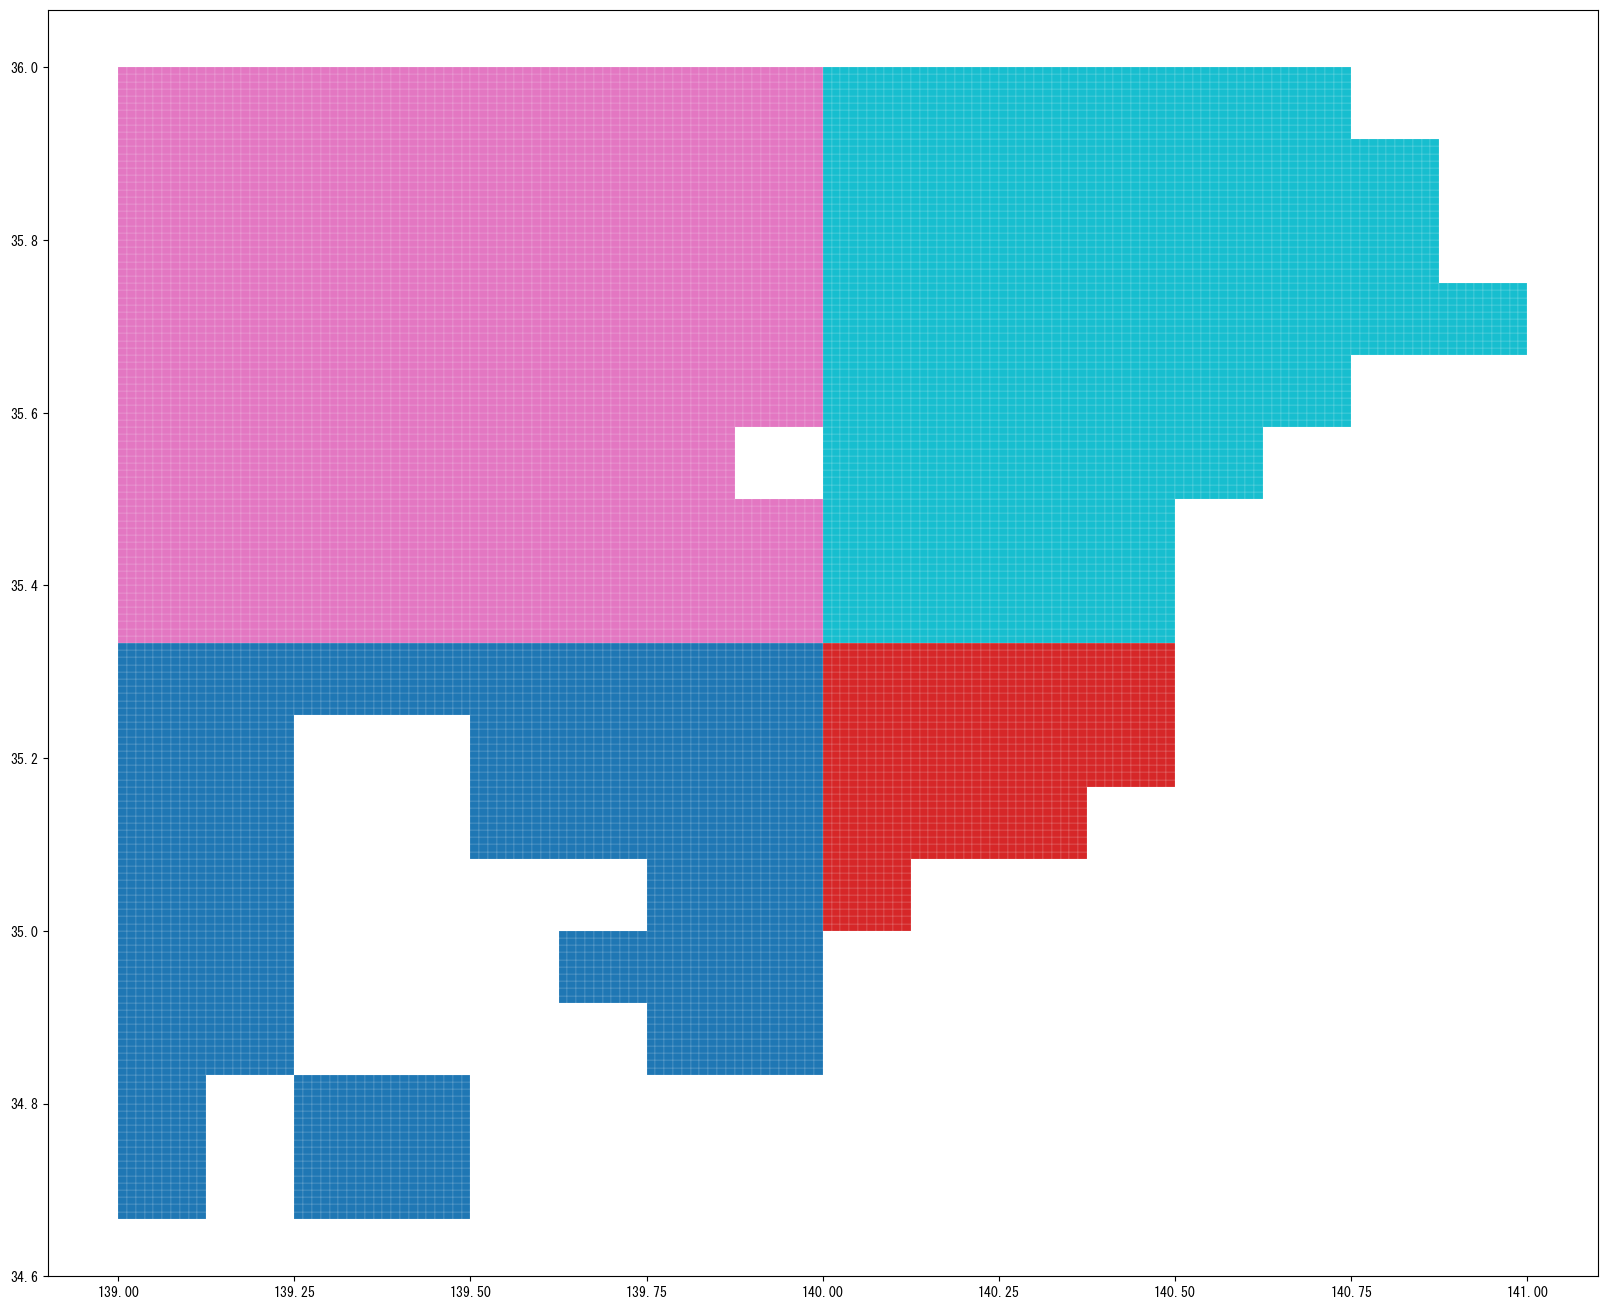

In [4]:
chibamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [5]:
chibamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,52390000,5239,00,00,1,"POLYGON ((139.01250 34.66667, 139.00000 34.666..."
1,52390001,5239,00,01,2,"POLYGON ((139.02500 34.66667, 139.01250 34.666..."
2,52390002,5239,00,02,3,"POLYGON ((139.03750 34.66667, 139.02500 34.666..."
3,52390003,5239,00,03,4,"POLYGON ((139.05000 34.66667, 139.03750 34.666..."
4,52390004,5239,00,04,5,"POLYGON ((139.06250 34.66667, 139.05000 34.666..."


In [6]:
chibamesh['KEY_CODE']=chibamesh['KEY_CODE'].astype(float)

In [24]:
chibamesh = chibamesh.merge(chibadata, on='KEY_CODE')

In [25]:
chibamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
5594,53396351.0,5339,63,51,5052,"POLYGON ((139.40000 35.87500, 139.38750 35.875...",0.0,NaN,NaN,72.0,...,1.0,0.0,26.0,23.0,3.0,1.0,16.0,0.0,1.0,5.0
10319,53407494.0,5340,74,94,4595,"POLYGON ((140.56250 35.99167, 140.55000 35.991...",0.0,NaN,NaN,326.0,...,5.0,5.0,79.0,46.0,33.0,4.0,77.0,0.0,13.0,15.0
146,52392191.0,5239,21,91,792,"POLYGON ((139.15000 34.90833, 139.13750 34.908...",0.0,NaN,NaN,34.0,...,0.0,0.0,11.0,10.0,1.0,0.0,13.0,0.0,6.0,4.0
4411,53394488.0,5339,44,88,3589,"POLYGON ((139.61250 35.73333, 139.60000 35.733...",0.0,NaN,NaN,12791.0,...,22.0,5.0,3486.0,3324.0,162.0,526.0,2408.0,318.0,999.0,689.0
2294,53390311.0,5339,03,11,312,"POLYGON ((139.40000 35.34167, 139.38750 35.341...",0.0,NaN,NaN,7002.0,...,22.0,8.0,1971.0,1819.0,152.0,263.0,1096.0,107.0,260.0,339.0


In [26]:
chibamesh = chibamesh.to_crs(3857)

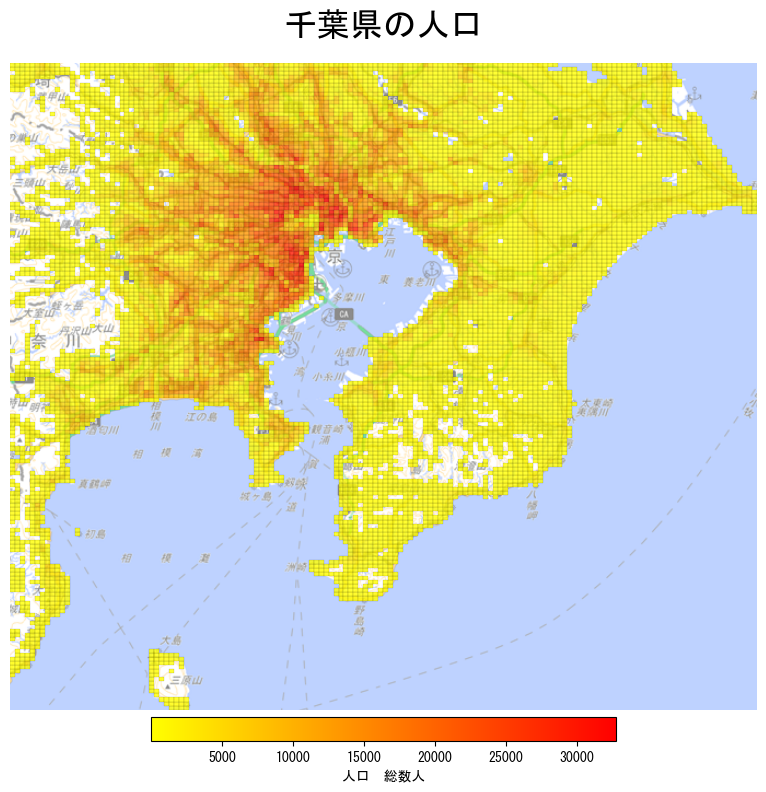

In [27]:
# 人口マップ
fig, ax = plt.subplots(figsize=(10,10))

chibamesh.plot(ax=ax,
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
        #  vmax=3000,
         legend_kwds={'label': "人口　総数人",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
)

# マップの範囲を chibamesh の境界に設定
ax.set_xlim(chibamesh.total_bounds[0], chibamesh.total_bounds[2])
ax.set_ylim(chibamesh.total_bounds[1], chibamesh.total_bounds[3])

# 軸を非表示にする
ax.axis('off')

# タイトル
ax.set_title('千葉県の人口',fontsize=24,pad=20);

# ベースマップを追加
cx.add_basemap(ax,source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png')